In [1]:
# matplotlib
import matplotlib
import matplotlib.pyplot
import matplotlib.axes

# deep-signature
from deep_signature import manifolds
from deep_signature import discrete_distributions
from deep_signature import datasets
from deep_signature import groups

In [2]:
planar_curves_manager = manifolds.PlanarCurvesManager()
planar_curves_manager.load(curves_file_path="C:/deep-signature-data-new/curves/train/curves.npy")
print(f'{planar_curves_manager.planar_curves_count} curves loaded')

98714 curves loaded


In [3]:
# for planar_curve in planar_curves_manager.planar_curves[:5]:
#     fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=2, figsize=(40, 10))
#     discrete_distribution = discrete_distributions.MultimodalGaussianDiscreteDistribution(bins_count=planar_curve.points_count, multimodality=15)
#     # discrete_distribution = discrete_distributions.UniformDiscreteDistribution(bins_count=planar_curve.points_count)
#     discrete_distribution.plot_dist(ax=axes[0])
#     sampled_planar_curve = planar_curve.sample_curve(sampling_ratio=0.3, discrete_distribution=discrete_distribution)
#     sampled_planar_curve.plot_scattered_curve(ax=axes[1], cmap='hsv')
#     matplotlib.pyplot.show()

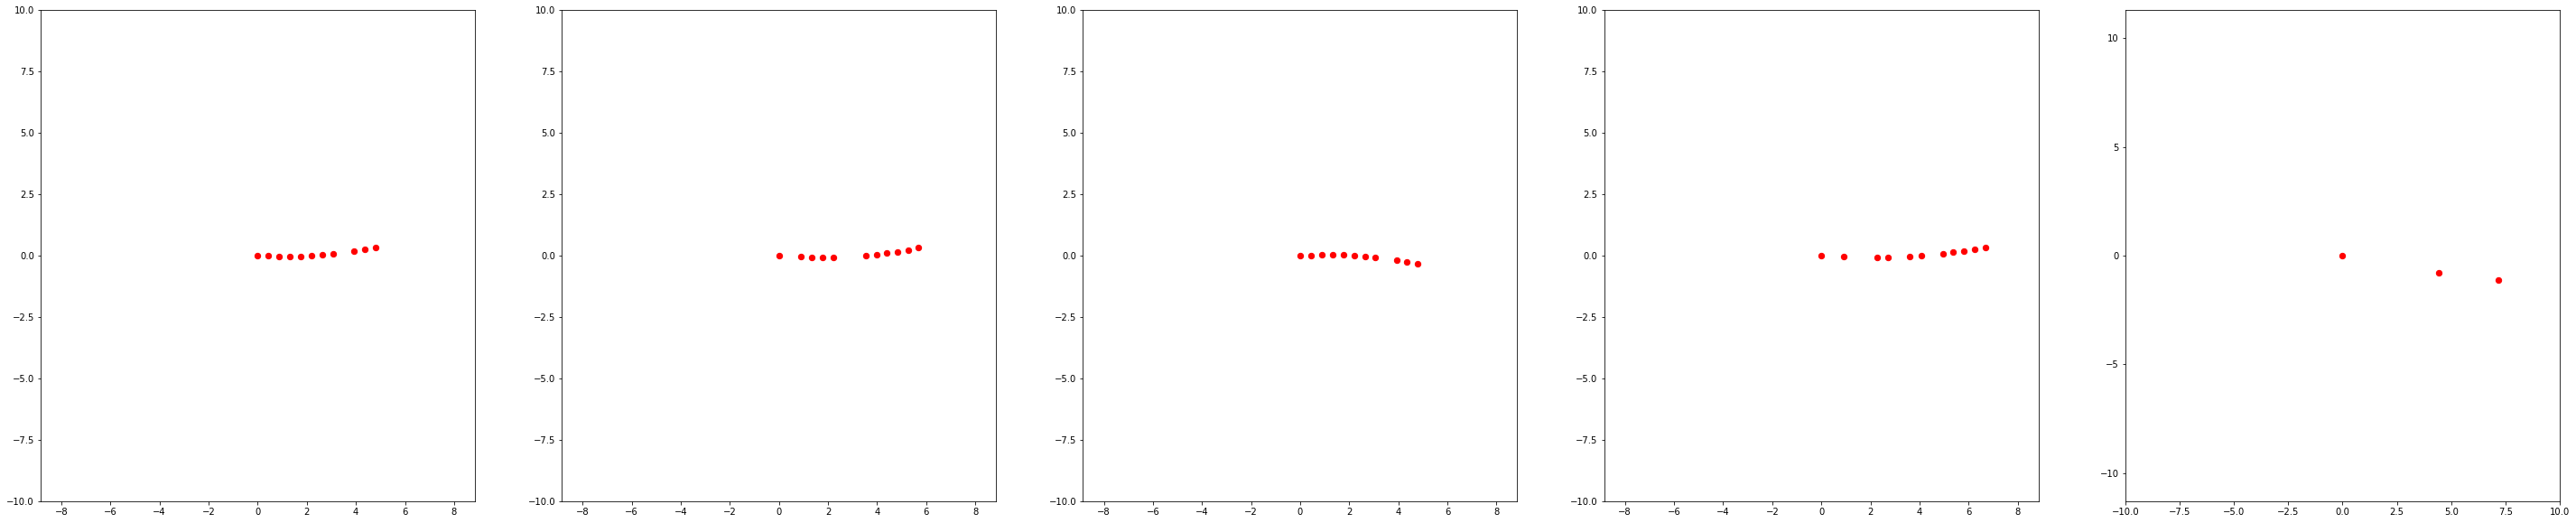

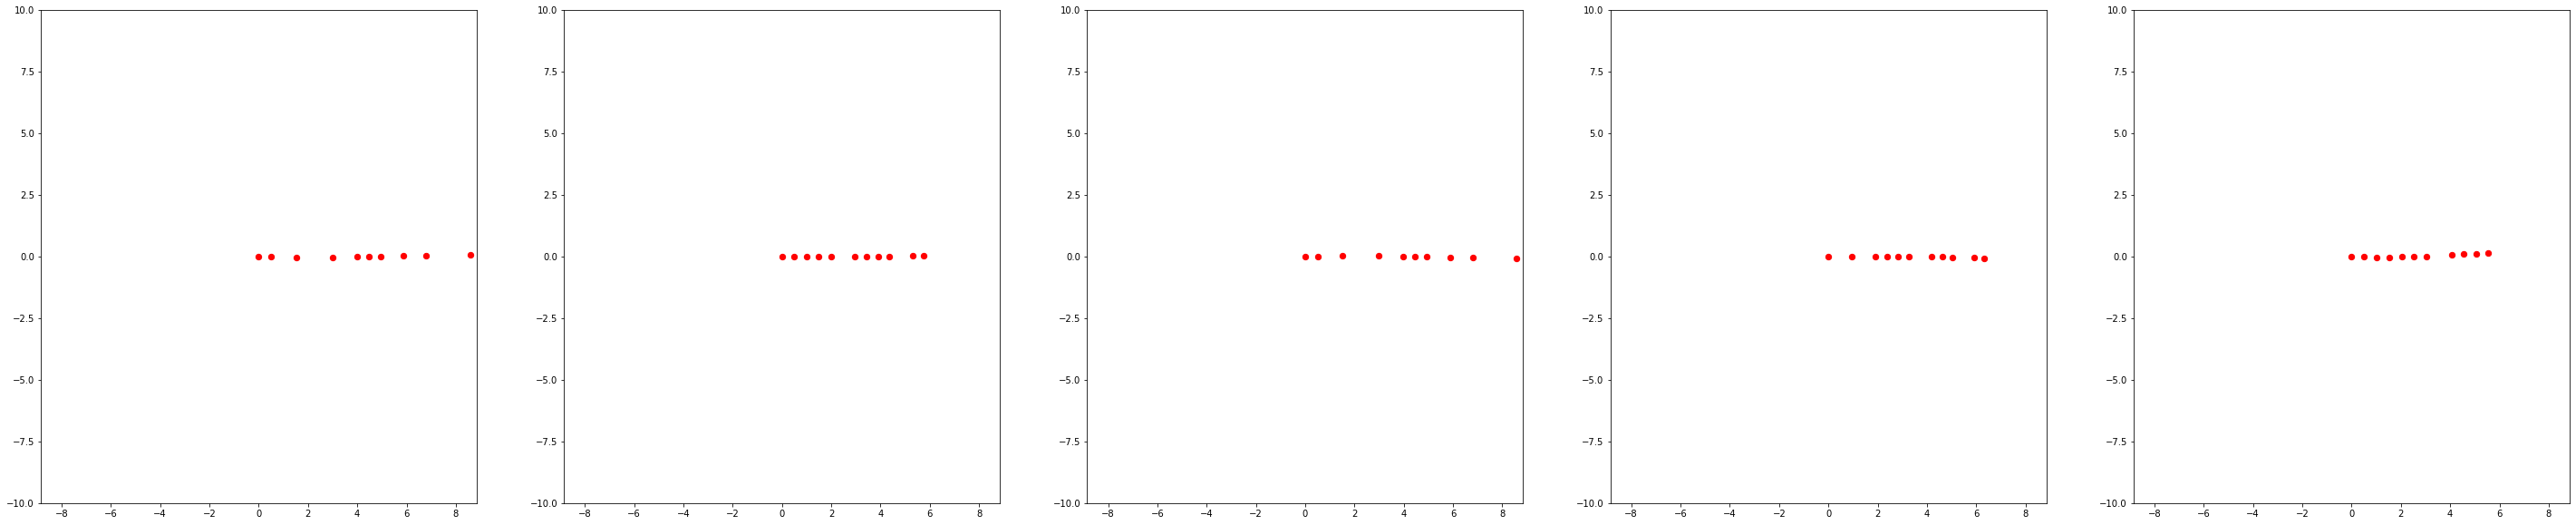

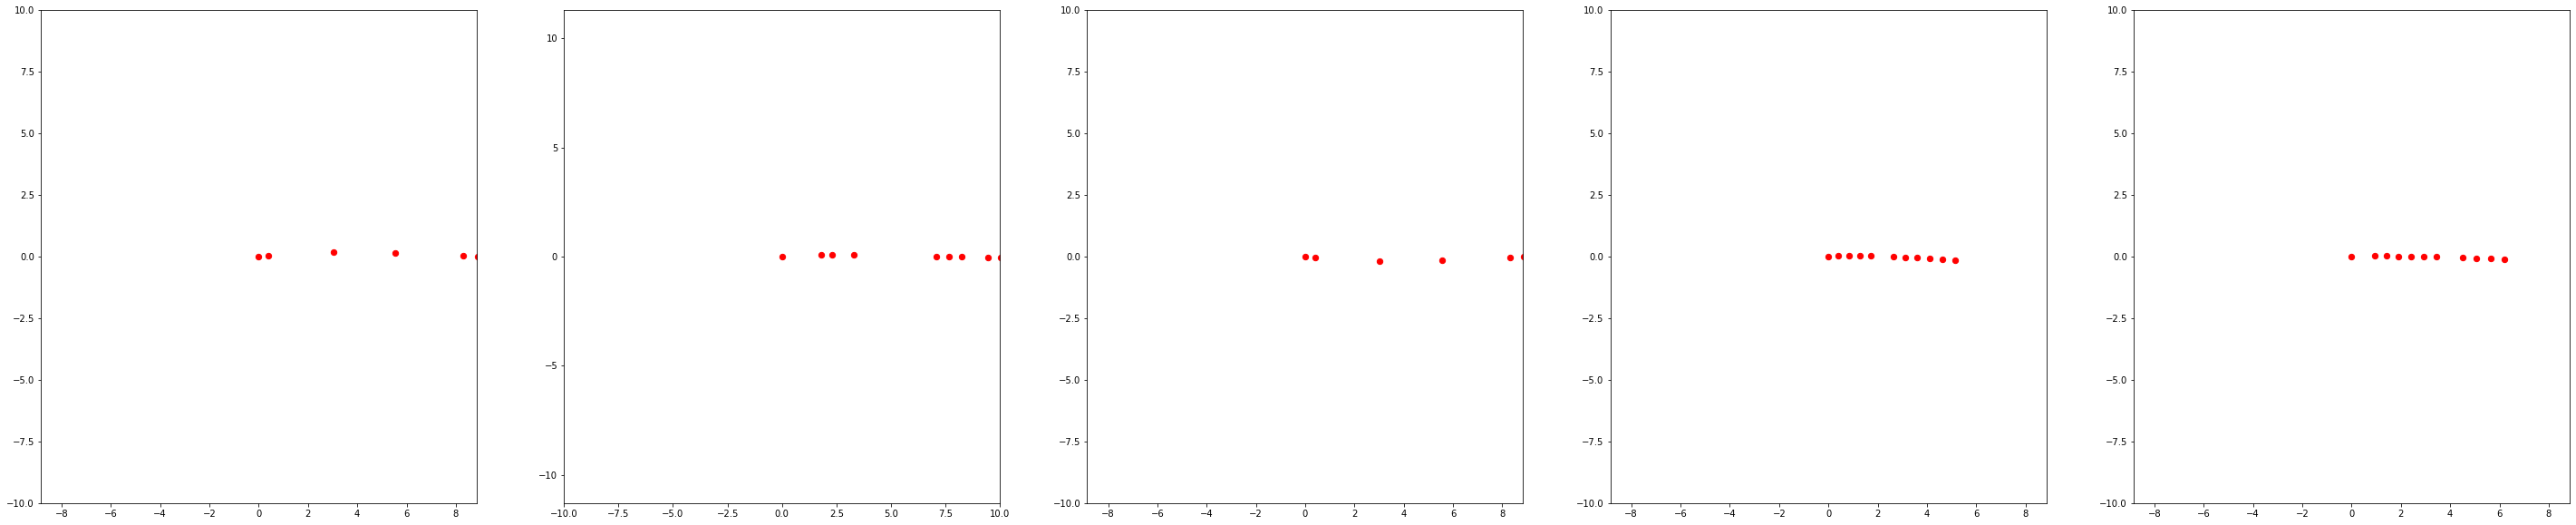

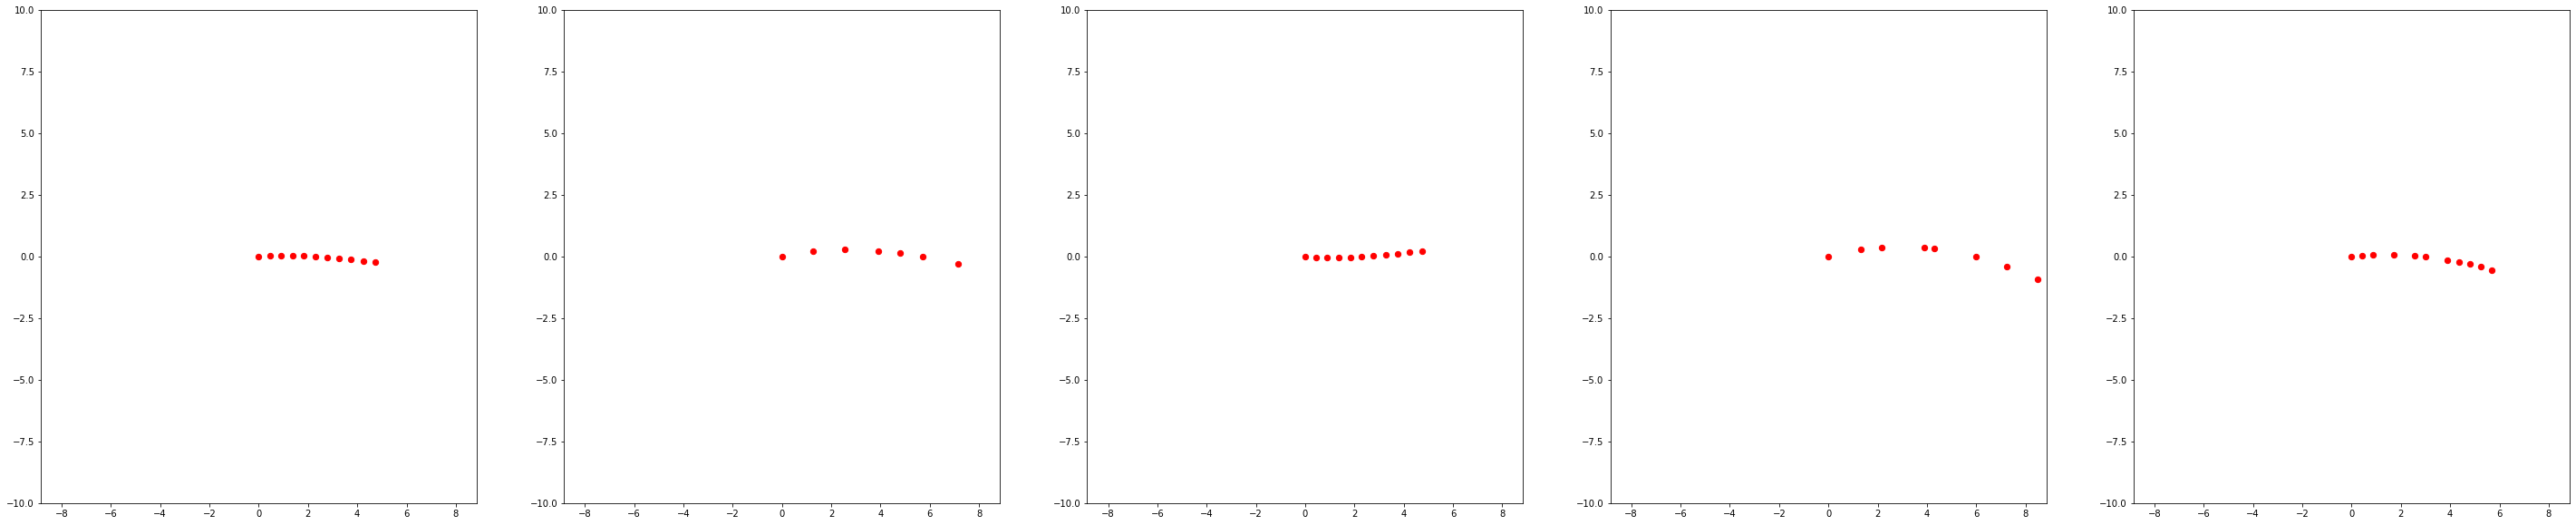

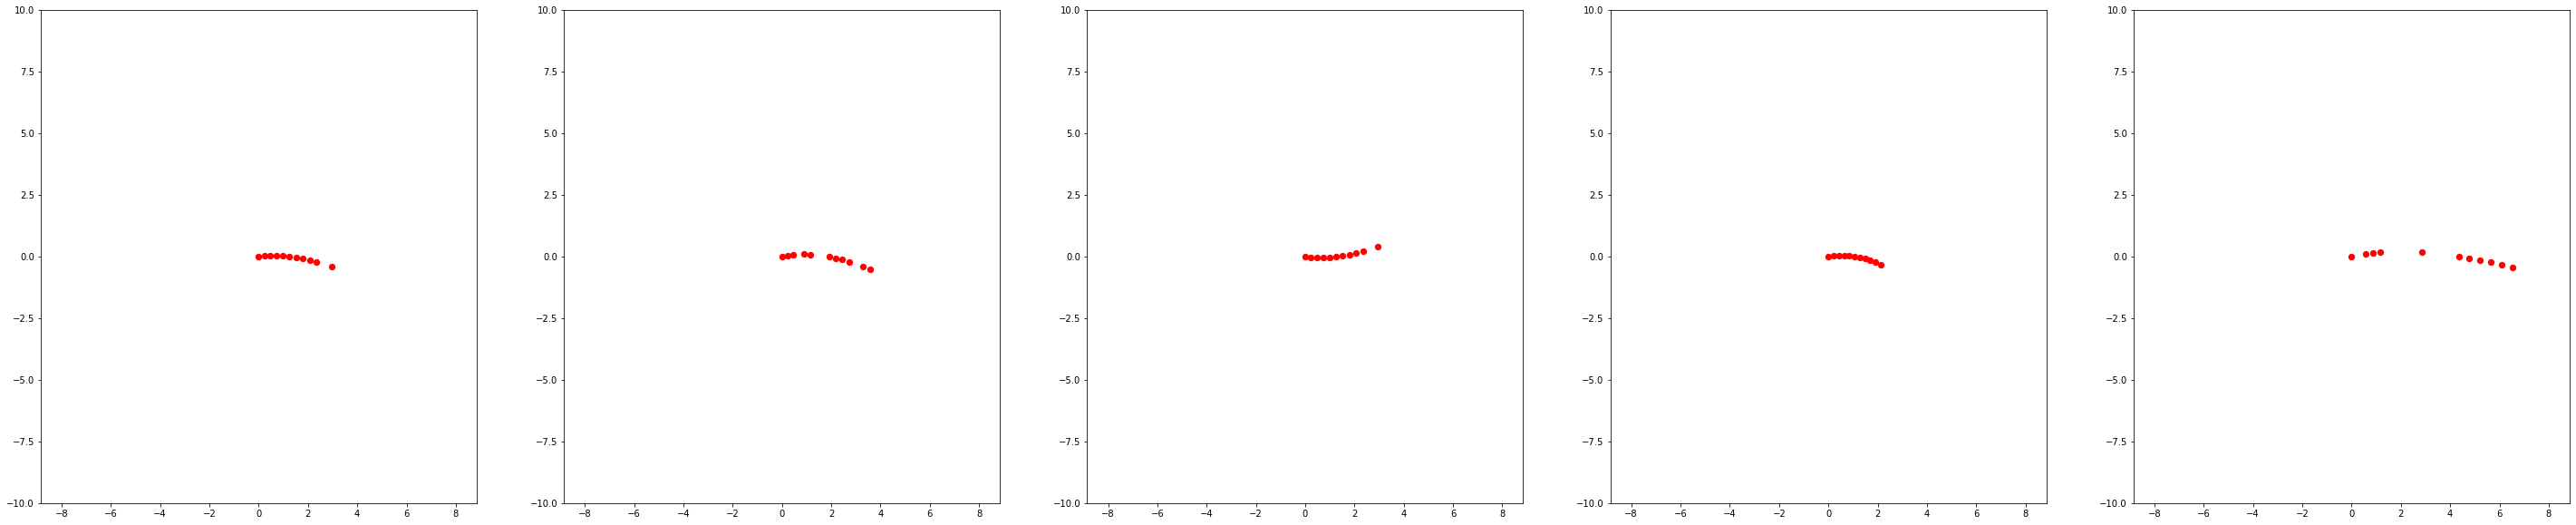

In [13]:
group = groups.EuclideanGroup()
dataset = datasets.CurveNeighborhoodTupletsDataset(
    planar_curves_manager=planar_curves_manager,
    group=group,
    dataset_size=10000,
    supporting_points_count=5,
    negative_examples_count=2,
    min_sampling_ratio=0.3,
    max_sampling_ratio=0.9,
    min_multimodality=10,
    max_multimodality=20,
    min_negative_example_offset=5,
    max_negative_example_offset=15)

for i in range(5):
    tuplet = dataset[i]
    fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=tuplet.shape[0], figsize=(50, 10))
    for j in range(tuplet.shape[0]):
        planar_curve = manifolds.PlanarCurve(points=tuplet[j], closed=False)
        planar_curve.plot_scattered_curve(ax=axes[j], point_size=40)
        axes[j].axis('equal')
        axes[j].set_xlim([-10, 10])
        axes[j].set_ylim([-10, 10])
    matplotlib.pyplot.show()